In [25]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [26]:
datasets = {}

for i in range(1, 9):
    with open(f'pickle/dataset_v{i}.pkl', 'rb') as f:
        datasets[f'v{i}'] = pickle.load(f)

v1 = datasets['v1']
v2 = datasets['v2']
v3 = datasets['v3']
v4 = datasets['v4']
v5 = datasets['v5']
v6 = datasets['v6']
v7 = datasets['v7']
v8 = datasets['v8']

In [36]:
X_train = v5['X_train']
X =  np.array((v3['X_train'].sample(5000)))

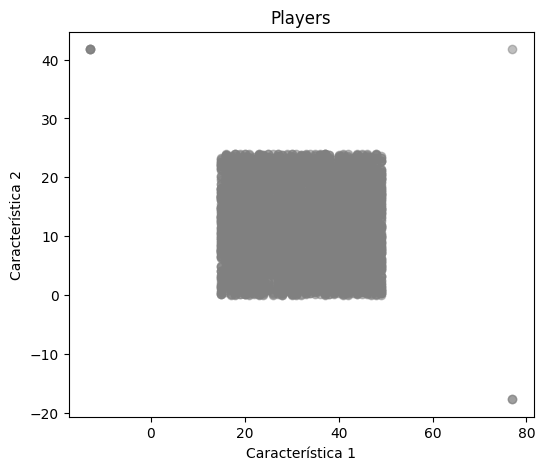

In [37]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5)
plt.title("Players")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

In [29]:
silhouette_scores = []
inertias = [] # SSE
k_values = range(2, 8)

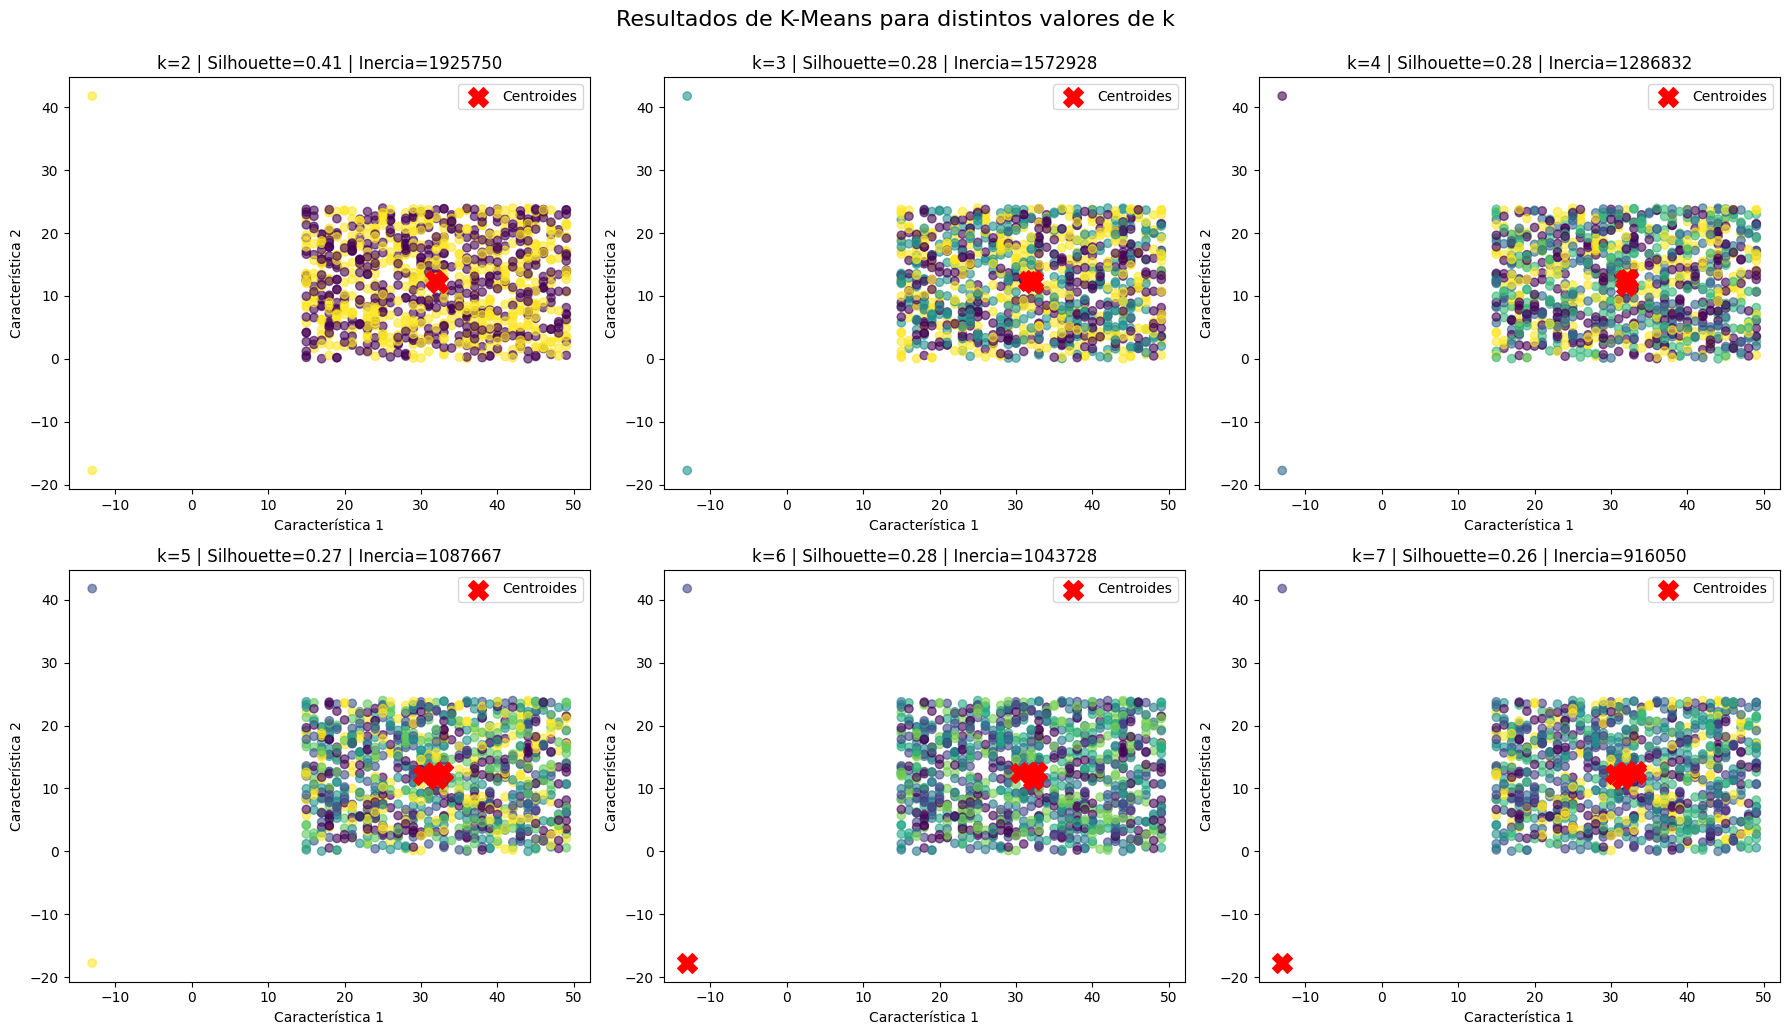

In [30]:
ig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()

for idx, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)  # Define el número de clusters
    labels = kmeans.fit_predict(X)                            # Aplica el modelo y obtiene las etiquetas
    centers = kmeans.cluster_centers_                     # Obtiene las coordenadas de los centroides
    inertia = kmeans.inertia_                            # Inercia: suma de distancias intra-cluster
    score = silhouette_score(X, labels)                  # Calcula el Silhouette Score

    silhouette_scores.append(score)
    inertias.append(inertia)


    axs[idx].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    axs[idx].scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroides')
    axs[idx].set_title(f"k={k} | Silhouette={score:.2f} | Inercia={inertia:.0f}")
    axs[idx].set_xlabel("Característica 1")
    axs[idx].set_ylabel("Característica 2")
    axs[idx].legend()

plt.tight_layout()
plt.suptitle("Resultados de K-Means para distintos valores de k", fontsize=16, y=1.03)
plt.show()

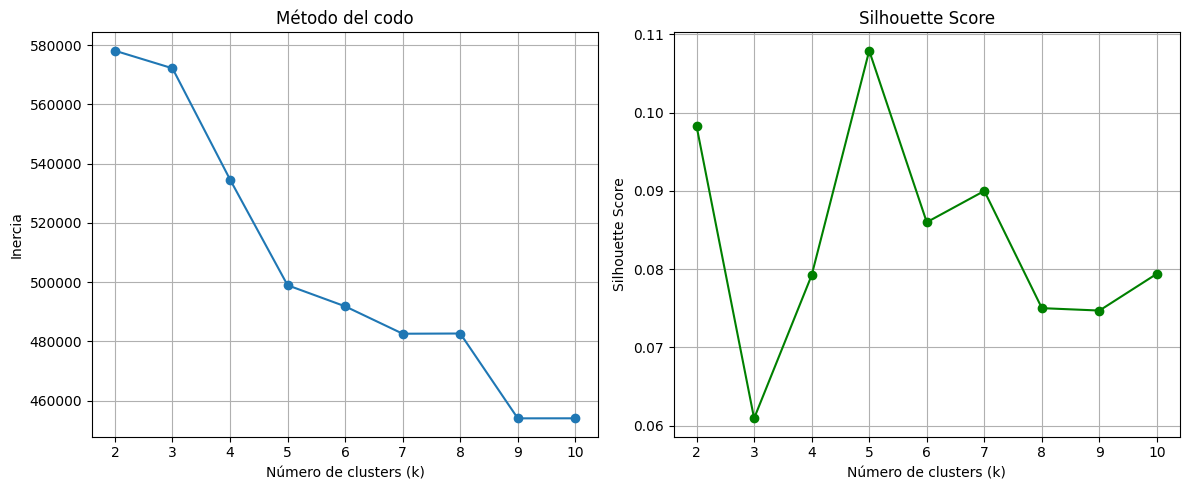

Cantidad óptima de clústeres según silhouette score: 5


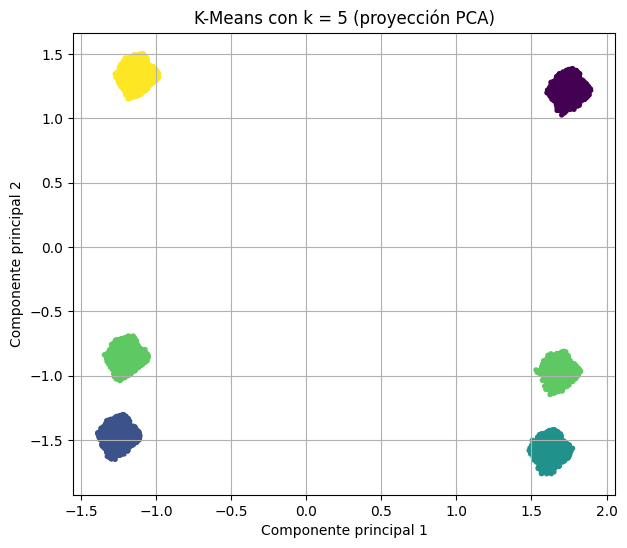

In [24]:

# Supón que X_train es un ndarray (ya cargado y escalado)
# X_train = ... (deberás cargarlo tú previamente)

# Rango de clusters a probar
k_values = range(2, 11)
inertias = []
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_train)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_train, labels))

# Visualización del método del codo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker='o')
plt.title("Método del codo")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.grid(True)

# Visualización del silhouette score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouettes, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()

# Elegir k óptimo (puedes ajustarlo tras ver la gráfica)
optimal_k = k_values[np.argmax(silhouettes)]
print(f"Cantidad óptima de clústeres según silhouette score: {optimal_k}")

# Entrenar KMeans final con k óptimo
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
labels_final = kmeans_final.fit_predict(X_train)

# Visualización en 2D con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(7, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_final, cmap='viridis', s=8)
plt.title(f"K-Means con k = {optimal_k} (proyección PCA)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.grid(True)
plt.show()

# K_Means